In [1]:
## Params and loading packages

## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
annotation=doc['annotation']
tss_annotation=doc['tss_annotation']



import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
#mpl.style.use('fivethirtyeight')
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
#%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
from cycler import cycler
from Modules.Homer import *

%matplotlib inline

print('Number of tissues: ',len(tissues))

### Till here

('Number of tissues: ', 16)


/home/isshamie/software/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Distance to TSS

In [2]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

In [3]:
txn_pd = pickle.load(open("Results/txn_df.p",'rb'))

In [4]:
anno_peaks = pd.read_csv('Results/peaks_with_tss_and_gene.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 2000]

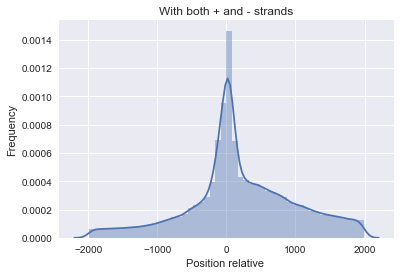

In [5]:
sns.distplot(anno_peaks['Distance to TSS'])
plt.ylabel('Frequency')
plt.title('With both + and - strands')
plt.xlabel('Position relative ')
plt.savefig("Results/Distance_to_TSS_neg_included.png")

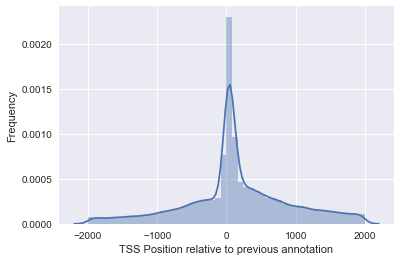

In [7]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Distance_to_TSS.png",bbox_inches='tight')

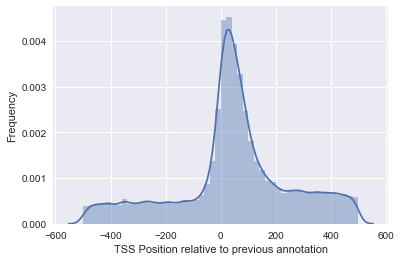

In [9]:
anno_500 = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 500]
sns.distplot(anno_500[anno_500['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Distance_to_TSS_500.png",bbox_inches='tight')

### Look at ones only in CHO

In [17]:
peak_tissue_matrix = pd.read_csv('Results/merged/peaks_tissues.csv',index_col=0)
peak_tissue_matrix = peak_tissue_matrix[peak_tissue_matrix.index.isin(anno_peaks[anno_peaks['isSameStrand']].index)]

## Take the max between the two
cho_peaks = peak_tissue_matrix.loc[:,peak_tissue_matrix.columns.str.contains('CHO')].max(axis=1)

## cho_peaks greater than 0
cho_peaks = cho_peaks[(cho_peaks>0)].index #

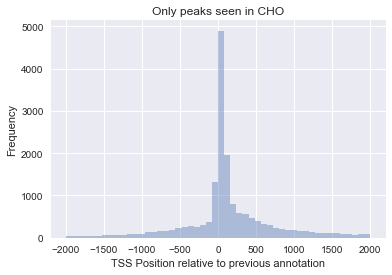

In [39]:
sns.distplot(anno_peaks[anno_peaks['isSameStrand']].loc[cho_peaks,'Distance to TSS'],norm_hist=False,kde=False)
plt.title('Only peaks seen in CHO')
plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Distance_to_TSS_CHO.png",bbox_inches='tight')

## Nucleotide frequency plot

annotatePeaks.pl Results/merged/all_peaks_merged.tsv /data/isshamie/genome/picr.fa -size 200 -hist 1 -di > Results/nuc_freq_200.txt


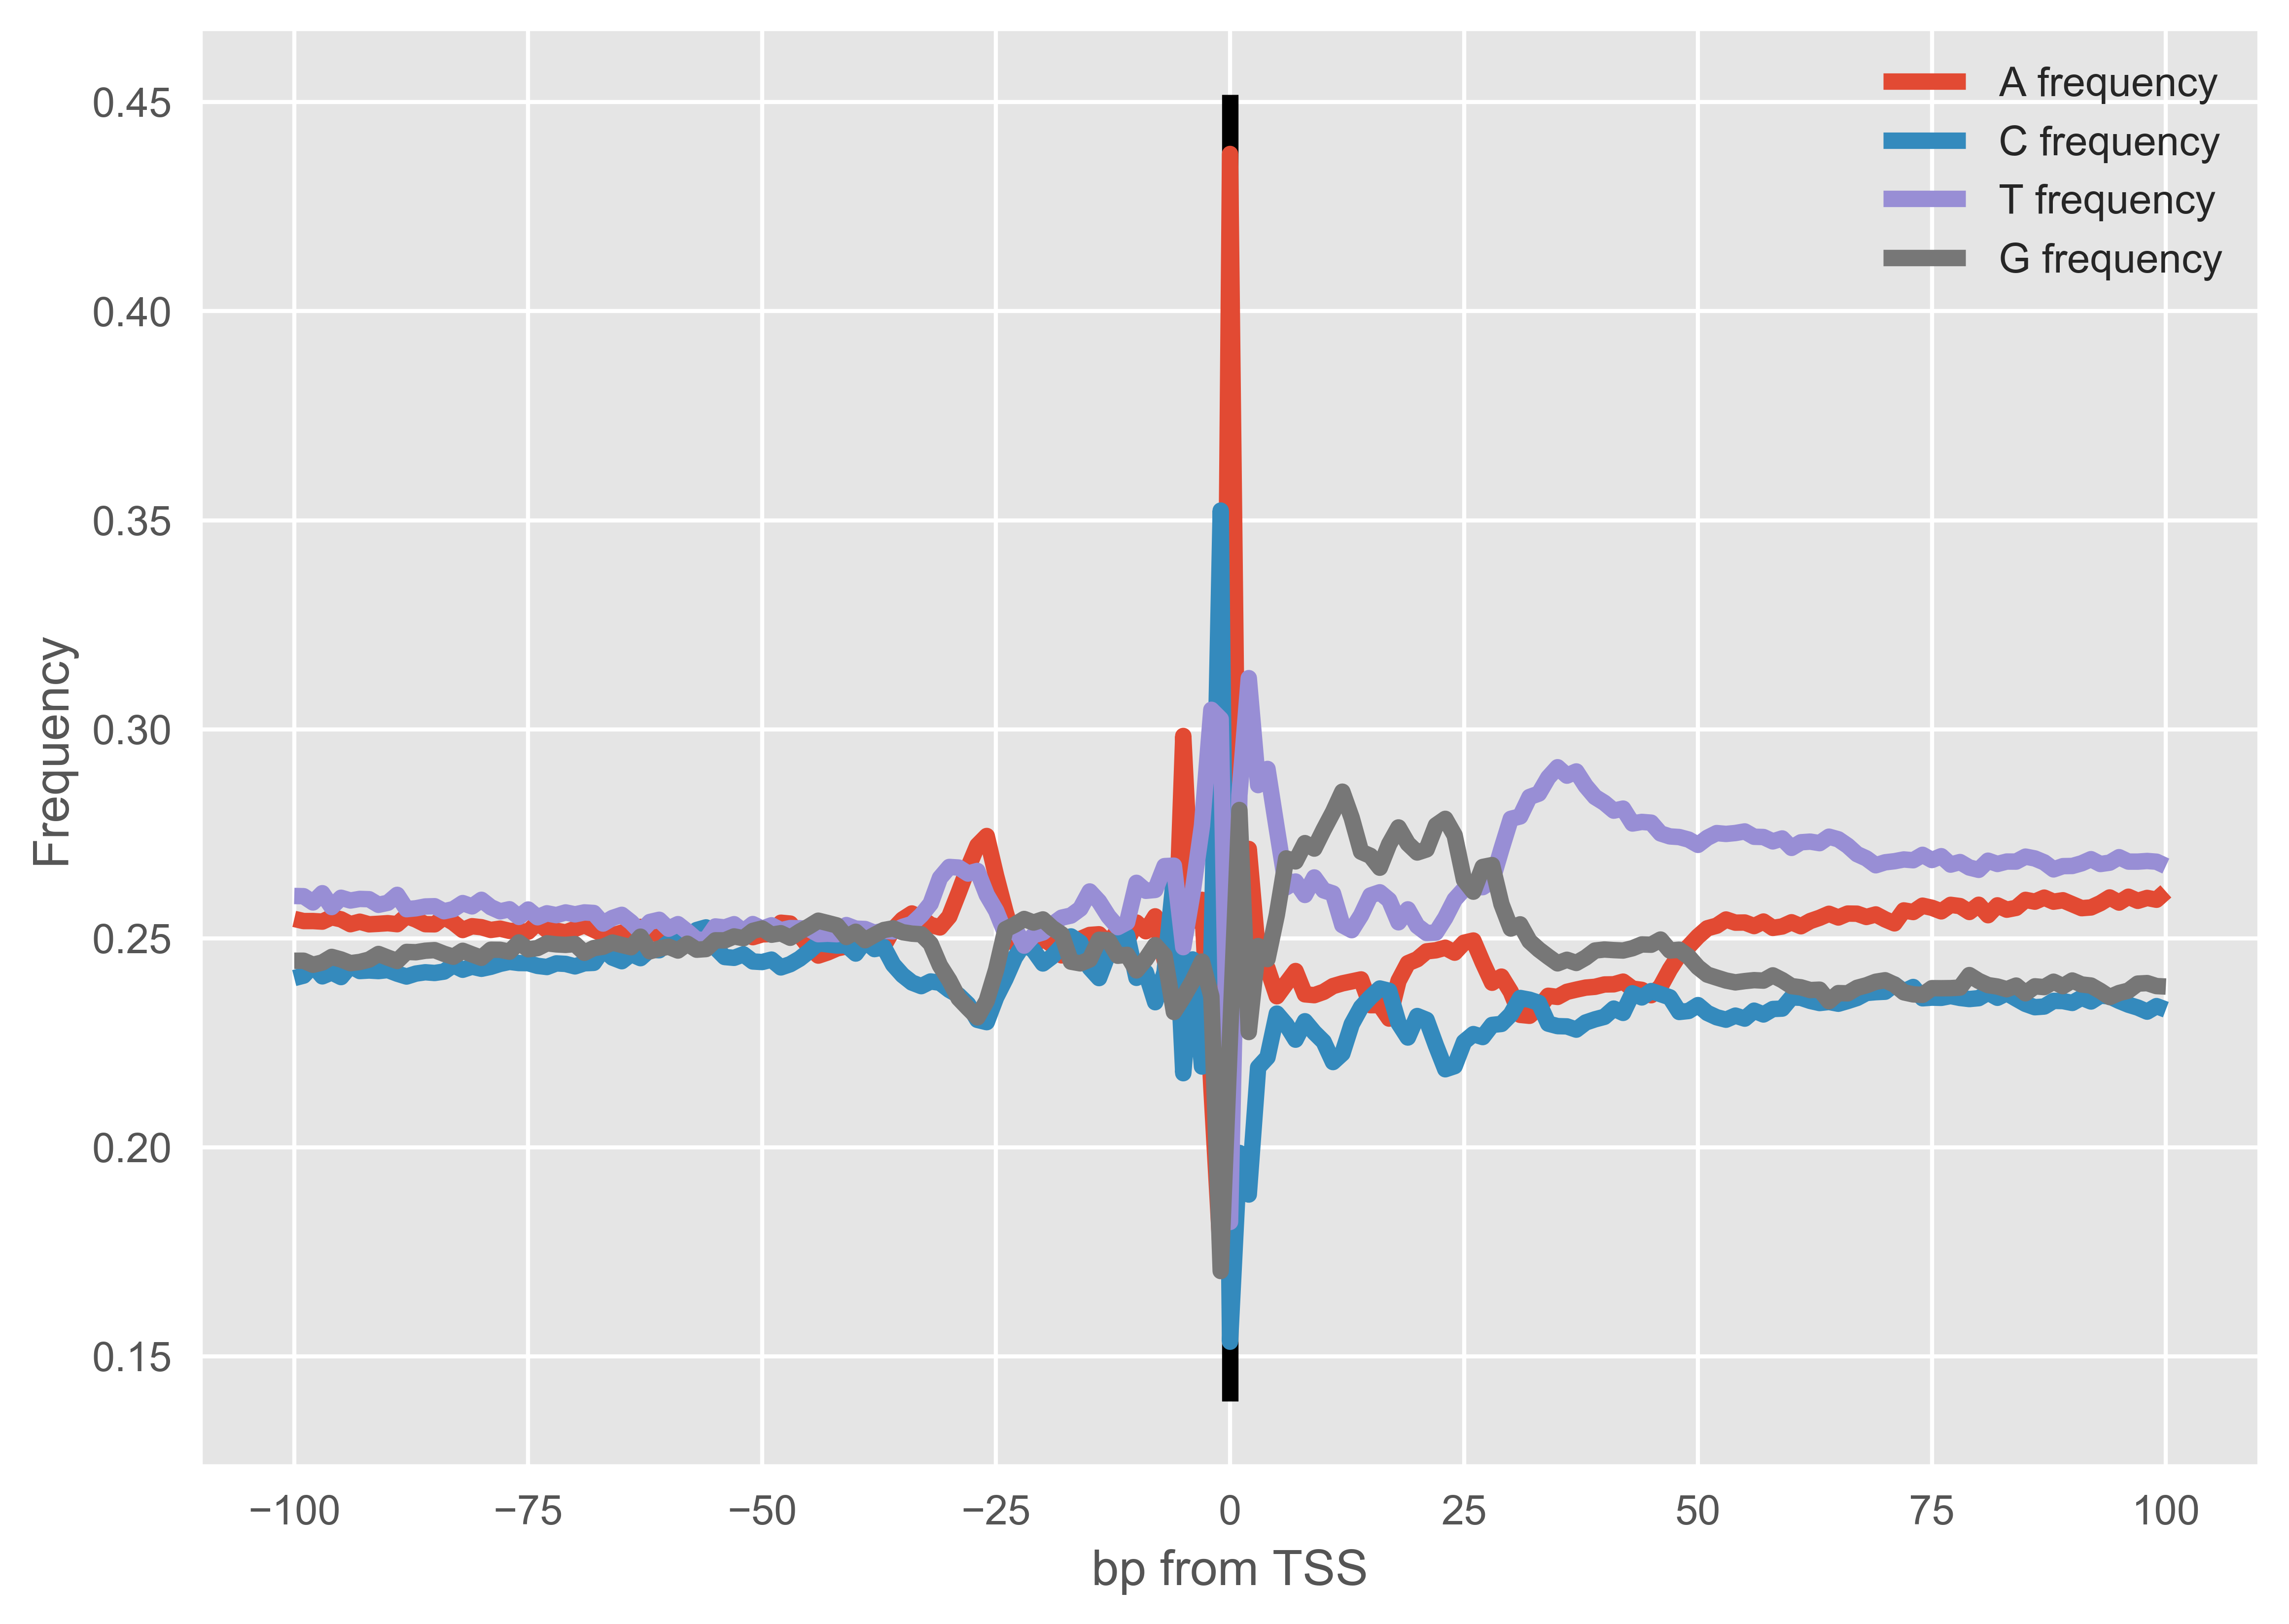

In [12]:
homer_nucleotide('Results/merged/all_peaks_merged.tsv','Results/nuc_freq_200.txt',
                 '/data/isshamie/genome/picr.fa',size=200)

### Tissue Distribution

In [40]:
gene_df = pickle.load(open("Results/gene_df.p",'rb'))

In [41]:
gene_df['tissues'][0]

['BMDMwt_GRO',
 'Brain_GRO',
 'Brain_mSTART',
 'Heart_mSTART',
 'Kidney_GRO',
 'Kidney_mSTART',
 'Liver_GRO',
 'Liver_mSTART',
 'Lung_GRO',
 'Lung_mSTART',
 'Muscle_mSTART',
 'Pancreas_mSTART',
 'Spleen_GRO',
 'Spleen_mSTART',
 'CHO_GRO',
 'CHO_mSTART']

In [42]:
not_in_cho = []
in_cho = []
all_t = []
for g in gene_df['tissues']:
    curr = [i.split('_')[0] for i in g ]
    curr = np.unique(np.array(curr))
    if 'CHO' in curr:
        in_cho.append(len(curr))
    else:
        not_in_cho.append(len(curr))
    all_t.append(len(curr))

/home/isshamie/software/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


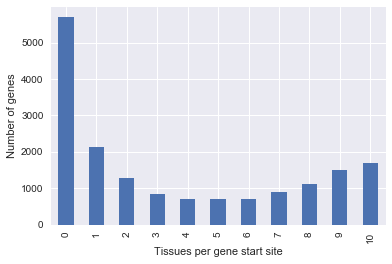

In [13]:
from collections import Counter
pd.Series(Counter(all_t)).plot.bar()
plt.xlabel('Tissues per gene start site')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues.png',bbox_inches='tight')

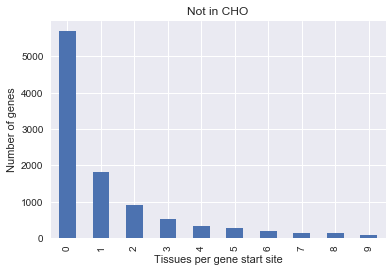

In [14]:
from collections import Counter
pd.Series(Counter(not_in_cho)).plot.bar()
plt.xlabel('Tissues per gene start site')
plt.title('Not in CHO')
plt.ylabel('Number of genes')
plt.savefig('Results/Figures/num_tissues_not_in_cho.png',bbox_inches='tight')

In [44]:
gene_df

,peaks,numberOfPeaks,peaksWithin_1kb_100bp,promoterPeaks,tissues,minDistance,minDistancePeak,maxValue,maxPeakId,maxTissues,Chr,Start,End,gene_id,gene,transcript,hasGene,Number of SS
SERHL,"[Merged-picr_74-10067746-3, Merged-picr_0-2095...",10,"[Merged-picr_74-10067746-3, Merged-picr_0-2095...","[Merged-picr_74-10067746-3, Merged-picr_0-2095...","[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",31,Merged-picr_0-20959-16,1666.35,Merged-picr_74-10067746-3,"[Heart_mSTART, Kidney_GRO, Kidney_mSTART]",picr_74,10067654,10067857,gene_26628_1,SERHL,asmbl_75212,True,2
RRP7A,"[Merged-picr_10-20507337-4, Merged-picr_0-4463...",26,"[Merged-picr_0-44638-7, Merged-picr_0-44487-4]",[Merged-picr_0-44487-4],"[Brain_GRO, Brain_mSTART, Spleen_mSTART, CHO_m...",26,Merged-picr_0-44487-4,10.105,Merged-picr_0-44487-4,"[Brain_GRO, Brain_mSTART, Spleen_mSTART, CHO_m...",picr_0,44409,44566,gene_2,RRP7A,asmbl_10,True,1
POLDIP3,"[Merged-picr_0-78615-14, Merged-picr_0-98815-1...",38,"[Merged-picr_0-78615-14, Merged-picr_0-98958-1...",[Merged-picr_0-78299-12],"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",-41,Merged-picr_0-78299-12,34.8,Merged-picr_0-78299-12,"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",picr_0,78177,78416,gene_3_1,POLDIP3,asmbl_19,True,1
CYB5R3,"[Merged-picr_0-94356-1, Merged-picr_0-92870-1,...",16,"[Merged-picr_0-92870-1, Merged-picr_0-92200-1,...","[Merged-picr_0-92200-1, Merged-picr_0-92664-2]","[BMDMwt_GRO, CHO_mSTART]",0,Merged-picr_0-92200-1,4.51,Merged-picr_0-92200-1,[BMDMwt_GRO],picr_0,92125,92275,gene_3_2,CYB5R3,asmbl_20,True,2
A4GALT,"[Merged-picr_0-185727-8, Merged-picr_0-185806-...",31,"[Merged-picr_0-185727-8, Merged-picr_0-185806-...","[Merged-picr_0-185727-8, Merged-picr_0-186292-5]","[BMDMwt_GRO, Brain_GRO, Heart_mSTART, Kidney_G...",5,Merged-picr_0-186292-5,30.75,Merged-picr_0-185727-8,"[BMDMwt_GRO, Brain_GRO, Heart_mSTART, Kidney_G...",picr_0,185649,185806,gene_4_3,A4GALT,asmbl_30,True,2
ARFGAP3,"[Merged-picr_0-298206-10, Merged-picr_0-275657...",23,"[Merged-picr_0-298206-10, Merged-picr_0-275792...",[Merged-picr_0-298206-10],"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Kidney_G...",29,Merged-picr_0-298206-10,307.9,Merged-picr_0-298206-10,"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Kidney_G...",picr_0,298116,298309,gene_5_1,ARFGAP3,asmbl_31,True,1
PACSIN2,"[Merged-picr_0-398822-16, Merged-picr_0-399078...",58,"[Merged-picr_0-398822-16, Merged-picr_0-399078...","[Merged-picr_0-398822-16, Merged-picr_0-364379...","[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",24,Merged-picr_0-364379-11,1197.35,Merged-picr_0-398822-16,"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",picr_0,398728,398918,gene_6,PACSIN2,asmbl_43,True,2
TTLL1,"[Merged-picr_0-440919-12, Merged-picr_0-441054...",5,"[Merged-picr_0-440919-12, Merged-picr_0-441054-4]",[Merged-picr_0-440919-12],"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",25,Merged-picr_0-440919-12,158.3,Merged-picr_0-440919-12,"[BMDMwt_GRO, Brain_GRO, Brain_mSTART, Heart_mS...",picr_0,440836,440998,gene_7,TTLL1,asmbl_49,True,1
BIK,"[Merged-picr_0-470591-1, Merged-picr_0-457769-...",15,"[Merged-picr_0-470591-1, Merged-picr_0-456863-...","[Merged-picr_0-470591-1, Merged-picr_0-456863-...","[Liver_GRO, CHO_mSTART]",-9,Merged-picr_0-470591-1,19.5,Merged-picr_0-470591-1,[CHO_mSTART],picr_0,470516,470666,gene_11,BIK,asmbl_63,True,3
MCAT,"[Merged-picr_0-491595-9, Merged-picr_0-492294-...",10,"[Merged-picr_0-491595-9, Merged-picr_0-492294-...","[Merged-picr_0-491493-6, Merged-picr_0-492444-5]","[BMDMwt_GRO, Brain_GRO, Kidney_GRO, Lung_GRO, ...",23,Merged-picr_0-491493-6,12.45,Merged-picr_0-491493-6,"[BMDMwt_GRO, Brain_GRO, Lung_GRO, Spleen_GRO, ...",picr_0,491388,491602,gene_10,MCAT,asmbl_57,True,2


In [45]:
tissues

['BMDM1hKLA1',
 'BMDMwt',
 'Brain',
 'FemaleReproductive',
 'Heart',
 'Intestine',
 'Kidney',
 'Liver',
 'Lung',
 'MiscOrgans',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Total',
 'CHO']

### Plot fractions of genes covered in each tissue

In [80]:
tissues_genes = dict()
for t in tissues:
    tissues_genes[t] = 0

for ind,val in gene_df.iterrows():
    curr_ts = set()
    for t in val['maxTissues']:
        curr_ts.add(t.split('_')[0])
    for t in curr_ts:
        tissues_genes[t] += 1
        if '1h' in t or 'KLA' in t:
            print(t)

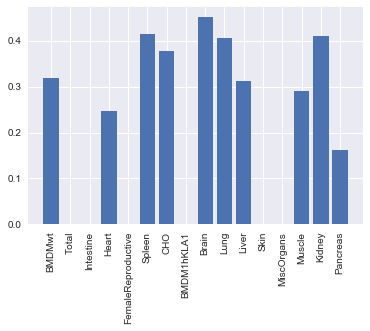

In [81]:
plt.bar(range(len(tissues_genes)), 1.0*np.array(tissues_genes.values())/(gene_df.shape[0]), align='center')
plt.xticks(range(len(tissues_genes)), list(tissues_genes.keys()),rotation=90);

In [ ]:
f = plt.figure()
ax = (np.sum((gene_tissue_matrix>0))/gene_df.shape[0]).plot.bar()
ax.set_title('Fraction of genes with a peak');
ax.set_xticklabels(meta_samples.loc[short_gene_tissue.columns,'Short']);
plt.tight_layout()
plt.savefig('Results/Figures/tissue_genes_gro_mstart_combined.png')